In [3]:
import pandas as pd
import numpy as np
import pickle
import torch

outfits_df = pickle.load(open("outfit_embeddings_df_paths.pkl", "rb"))
outfits_df

,outfit_id,outfit_version,file_name,embeddings
0,outfit.45ed1b534f9b418db7d38fd7f081fa49,3,outfit.45ed1b534f9b418db7d38fd7f081fa49_3.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
1,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a,0,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a_0.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
2,outfit.52e5a272205d4d3b92a12794d6afa6d9,0,outfit.52e5a272205d4d3b92a12794d6afa6d9_0.jpg,"[tensor(0.), tensor(1.0762), tensor(1.2814), t..."
3,outfit.1726aa1235254dc29f66789cfd48c5b9,0,outfit.1726aa1235254dc29f66789cfd48c5b9_0.jpg,"[tensor(0.), tensor(0.), tensor(2.0316), tenso..."
4,outfit.36746094c7154b3fa8e2d2901387f26a,3,outfit.36746094c7154b3fa8e2d2901387f26a_3.jpg,"[tensor(0.), tensor(0.), tensor(1.1273), tenso..."
...,...,...,...,...
4074,outfit.01e83892189444ea9d3673c318442b9b,3,outfit.01e83892189444ea9d3673c318442b9b_3.jpg,"[tensor(0.), tensor(0.), tensor(1.5022), tenso..."
4075,outfit.56d3f2c017784688a3884a555cf1ace2,1,outfit.56d3f2c017784688a3884a555cf1ace2_1.jpg,"[tensor(0.), tensor(2.2878), tensor(0.3644), t..."
4076,outfit.1bee365da3a84e53aecc44958f9c7bf8,2,outfit.1bee365da3a84e53aecc44958f9c7bf8_2.jpg,"[tensor(0.3667), tensor(0.9154), tensor(0.), t..."
4077,outfit.3ef6d2dce9f4492d905e79441b02fb8d,2,outfit.3ef6d2dce9f4492d905e79441b02fb8d_2.jpg,"[tensor(0.), tensor(0.9549), tensor(0.2560), t..."


In [4]:
from mysql.connector import (connection)
from Candidate_Generation import retrieve_candidates
from Database_Settings import DB_SETTINGS
import Database_connector

cnx = connection.MySQLConnection(**DB_SETTINGS)

db_connection = Database_connector.Db_Connection()
cursor = cnx.cursor(dictionary=True)
tag_query = "SELECT * FROM Tags WHERE 'meta.validto' >= '9999-01-01 00:00:00'"
cursor.execute(tag_query)
tag_results = cursor.fetchall()

tag_df = pd.DataFrame([list(order_dict.values()) for order_dict in tag_results], columns=list(tag_results[0].keys()))
tag_df

In [9]:
tag_df[~tag_df["tagCategory"].isin(["Brand", "Size"])]

,id,tag,tagCategory,timeCreated,timeUpdated,meta.validFrom,meta.validTo
0,Tags.00039a0fcd941ca82efc85fe20cafe96,Lyocell,Material,2020-03-25 10:43:09.374,2020-03-25 10:43:09.374,2019-04-25 11:24:30.000,9999-01-01 00:00:00
2,Tags.011ef588ccbdadd87e0e301ed0418754,Sporty,No category,2020-03-25 10:43:09.374,2020-03-25 10:43:09.374,2018-10-11 15:20:55.000,9999-01-01 00:00:00
5,Tags.01633494bcb90113a9db138389f7b6b7,FJONG Active,Occassion,2022-02-18 14:20:49.000,2022-02-18 14:25:24.264,2022-02-18 14:20:49.000,9999-01-01 00:00:00
13,Tags.052dd13817489d53f16b0e57dd59cdb2,Silk,Material,2020-03-25 10:43:09.374,2020-03-25 10:43:09.374,2016-09-17 13:18:00.000,9999-01-01 00:00:00
16,Tags.069f70bf3ea96d61b5b7a4ce9dcf101b,Empire,Waist,2020-03-25 10:43:09.374,2020-03-25 10:43:09.374,2018-10-22 12:16:29.000,9999-01-01 00:00:00
...,...,...,...,...,...,...,...
625,Tags.fdfcc27d09c074e3c292b27d7bc60938,Acetate,Material,2020-03-25 10:43:09.374,2020-03-25 10:43:09.374,2019-04-23 11:24:13.000,9999-01-01 00:00:00
626,Tags.fe033eac05a293ecd8b863e694b9c5d8,Metal,Material,2020-03-25 10:43:09.374,2020-03-25 10:43:09.374,2019-05-09 13:59:34.000,9999-01-01 00:00:00
628,Tags.fe0bd5ef98616eef603a1764ef5cd5a3,Business,Occassion,2020-03-25 10:43:09.374,2020-03-25 10:43:09.374,2017-01-31 16:48:35.000,9999-01-01 00:00:00
632,Tags.ffbba5b7c77a6b7b63963b09d65d9387,Triacetate,Material,2022-07-04 10:25:54.473,2022-07-04 10:25:54.473,2022-07-04 10:25:54.473,9999-01-01 00:00:00


In [4]:
size_tag_ids = tag_df[tag_df["tagCategory"] == "Size"][["id", "tag"]]

In [5]:
tag_df["tagCategory"].value_counts()

Brand            469
Material          42
Category          23
Color             18
Size              12
No category       11
Occassion          9
Sleeve             7
Embellishment      7
Neckline           7
Waist              6
Shoe Size          6
Pattern            6
Fit                4
Length             4
Occasion           2
brand              1
Name: tagCategory, dtype: int64

In [6]:
cursor = cnx.cursor(dictionary=True)
tag_query = "SELECT * FROM OutfitTags WHERE 'meta.validto' >= '9999-01-01 00:00:00'"
cursor.execute(tag_query)
outfit_tag_results = cursor.fetchall()
outfit_tag_df = pd.DataFrame([list(order_dict.values()) for order_dict in outfit_tag_results], columns=list(outfit_tag_results[0].keys()))
outfit_tag_df

,id,tagsId,outfitsId,timeCreated,timeUpdated,meta.validFrom,meta.validTo
0,OutfitTags.0000a84a2e3e471e8c56ac5c5301b9eb,Tags.3ebfb55600bfe275bc762adf796cd96f,outfit.0d4ea2e0abfe405e9e12fb60ea758715,2022-07-06 06:47:31.695,2022-07-06 06:47:31.695,2022-07-06 06:47:31.695,9999-01-01 00:00:00
1,OutfitTags.000394132c044c77b1a73c6527195d88,Tags.f7c902255b93befd80bb6cb23d867748,outfit.dc2afaf475e1495d987d7a029d3c77fa,2020-12-01 10:41:44.057,2020-12-01 10:41:44.057,2020-12-01 10:41:44.057,9999-01-01 00:00:00
2,OutfitTags.0004aa3872fd49719d0dcaff60d3ef5d,Tags.43e61d7fdaeb8fbc1a1c26b9ef625c33,outfit.be6b833240dd41beb24dcba0ce118f44,2022-07-01 11:12:13.966,2022-07-01 11:12:13.966,2022-07-01 11:12:13.966,9999-01-01 00:00:00
3,OutfitTags.0005402ab9014d1a8e5a91ec95d1d529,Tags.d9c4563553d7b1a7406bf000a40fbb5c,outfit.97d97dbf860e43f8b123511d01711aaa,2018-06-27 13:08:45.000,2020-03-25 10:43:09.542,2018-06-27 13:08:45.000,9999-01-01 00:00:00
4,OutfitTags.000557db651c43cd94803035897d41ac,Tags.c6cf08e9e9d57bcce49042c527082783,outfit.cfcd0076f6e64288b04558e58ff28c0c,2022-03-28 09:38:15.763,2022-03-28 09:38:15.763,2022-03-28 09:38:15.763,9999-01-01 00:00:00
...,...,...,...,...,...,...,...
123553,OutfitTags.fffd7077957544baad3799fa43ced98e,Tags.c7e51ef32ece20ff52b4256478f6152f,outfit.7397d45b36424b0abd75b055ce971691,2022-04-22 14:14:06.583,2022-04-22 14:14:06.583,2022-04-22 14:14:06.583,9999-01-01 00:00:00
123554,OutfitTags.fffdac68c2aa429db43911670ced9840,Tags.a6a5b14f3362b62f07d75bb185e3553a,outfit.98fd2627236f7f19,2018-11-30 20:47:26.000,2020-03-25 10:43:12.435,2018-11-30 20:47:26.000,9999-01-01 00:00:00
123555,OutfitTags.fffe840907d9495db3b57d13bc1e25a6,Tags.bc87c0c22e117b9baa3bd223c4cb7c65,outfit.d4725b957c614a8db628f3053e803141,2022-07-11 09:50:23.777,2022-07-11 09:50:23.777,2022-07-11 09:50:23.777,9999-01-01 00:00:00
123556,OutfitTags.ffff889292bb38c8a1fbfc85e0a7c740,Tags.b709b3094fe84d1c89b4a93255694a5b,outfit.a8783dc391d182c5,2017-07-11 09:29:57.000,2020-03-25 10:43:09.542,2017-07-11 09:29:57.000,9999-01-01 00:00:00


In [7]:
def get_outfit_tags(outfit_id):
    #test_outfit_id = outfits_df["outfit_id"].values[0]
    relevant_tags = outfit_tag_df[outfit_tag_df["outfitsId"] == outfit_id]
    outfit_tags = tag_df[tag_df["id"].isin(relevant_tags["tagsId"].values)]
    return outfit_tags

def apply_tags(outfit_id, column_name):
    outfit_tags = get_outfit_tags(outfit_id)
    return outfit_tags[column_name].values

# result_tags = get_outfit_tags(outfits_df["outfit_id"].values[0])
# result_tags["tag"].values

outfits_df["outfit_tags"] = outfits_df.apply(lambda row: apply_tags(row.outfit_id, "tag"), axis=1)
outfits_df["tag_categories"] = outfits_df.apply(lambda row: apply_tags(row.outfit_id, "tagCategory"), axis=1)

outfits_df

,outfit_id,outfit_version,file_name,embeddings,outfit_tags,tag_categories
0,outfit.45ed1b534f9b418db7d38fd7f081fa49,3,outfit.45ed1b534f9b418db7d38fd7f081fa49_3.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Urban Pioneers, Wool, Winter, Knitwear, Every...","[Brand, Material, No category, Category, Occas..."
1,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a,0,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a_0.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Nylon, Dressed-up, Viscose, Everyday, Fall, M...","[Material, No category, Material, Occassion, N..."
2,outfit.52e5a272205d4d3b92a12794d6afa6d9,0,outfit.52e5a272205d4d3b92a12794d6afa6d9_0.jpg,"[tensor(0.), tensor(1.0762), tensor(1.2814), t...","[Sporty, FJONG Active, Scandinavian Edition, W...","[No category, Occassion, Brand, No category, M..."
3,outfit.1726aa1235254dc29f66789cfd48c5b9,0,outfit.1726aa1235254dc29f66789cfd48c5b9_0.jpg,"[tensor(0.), tensor(0.), tensor(2.0316), tenso...","[Silk, Ruffles, Dressed-up, Going out, Midi, R...","[Material, Embellishment, No category, Occassi..."
4,outfit.36746094c7154b3fa8e2d2901387f26a,3,outfit.36746094c7154b3fa8e2d2901387f26a_3.jpg,"[tensor(0.), tensor(0.), tensor(1.1273), tenso...","[Wool, Winter, Second Female, Cotton, Knitwear...","[Material, No category, Brand, Material, Categ..."
...,...,...,...,...,...,...
4074,outfit.01e83892189444ea9d3673c318442b9b,3,outfit.01e83892189444ea9d3673c318442b9b_3.jpg,"[tensor(0.), tensor(0.), tensor(1.5022), tenso...","[Winter, Nylon, Cotton, Viscose, Loose fit, Kn...","[No category, Material, Material, Material, Fi..."
4075,outfit.56d3f2c017784688a3884a555cf1ace2,1,outfit.56d3f2c017784688a3884a555cf1ace2_1.jpg,"[tensor(0.), tensor(2.2878), tensor(0.3644), t...","[Silk, Acne Studios, Normal, Dresses, V-neck, ...","[Material, Brand, Waist, Category, Neckline, L..."
4076,outfit.1bee365da3a84e53aecc44958f9c7bf8,2,outfit.1bee365da3a84e53aecc44958f9c7bf8_2.jpg,"[tensor(0.3667), tensor(0.9154), tensor(0.), t...","[Viscose, Loose fit, Floral, Everyday, Normal,...","[Material, Fit, Pattern, Occassion, Waist, Siz..."
4077,outfit.3ef6d2dce9f4492d905e79441b02fb8d,2,outfit.3ef6d2dce9f4492d905e79441b02fb8d_2.jpg,"[tensor(0.), tensor(0.9549), tensor(0.2560), t...","[Dressed-up, C.L.E.A.N by Christina Ledang, Vi...","[No category, Brand, Material, Material, Occas..."


In [8]:
arb_tag_array = outfits_df["outfit_tags"].iloc[0]
arb_cat_array = outfits_df["tag_categories"].iloc[0]
where_result = np.where(arb_cat_array == "Size")
arb_tag_array[where_result[0]]

array(['Small'], dtype=object)

In [10]:
def find_size_tag(tags, tag_categories):
    where_result = np.where(tag_categories == "Size")
    return tags[where_result]

#outfits_df["size"] = outfits_df[["outfit_tags", "tag_categories"]].apply(lambda x: find_size_tag(x, x))
outfits_df["size"] = outfits_df.apply(lambda row: find_size_tag(row.outfit_tags, row.tag_categories), axis=1)
outfits_df

,outfit_id,outfit_version,file_name,embeddings,outfit_tags,tag_categories,size
0,outfit.45ed1b534f9b418db7d38fd7f081fa49,3,outfit.45ed1b534f9b418db7d38fd7f081fa49_3.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Urban Pioneers, Wool, Winter, Knitwear, Every...","[Brand, Material, No category, Category, Occas...",[Small]
1,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a,0,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a_0.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Nylon, Dressed-up, Viscose, Everyday, Fall, M...","[Material, No category, Material, Occassion, N...",[Medium]
2,outfit.52e5a272205d4d3b92a12794d6afa6d9,0,outfit.52e5a272205d4d3b92a12794d6afa6d9_0.jpg,"[tensor(0.), tensor(1.0762), tensor(1.2814), t...","[Sporty, FJONG Active, Scandinavian Edition, W...","[No category, Occassion, Brand, No category, M...",[Extra Large]
3,outfit.1726aa1235254dc29f66789cfd48c5b9,0,outfit.1726aa1235254dc29f66789cfd48c5b9_0.jpg,"[tensor(0.), tensor(0.), tensor(2.0316), tenso...","[Silk, Ruffles, Dressed-up, Going out, Midi, R...","[Material, Embellishment, No category, Occassi...",[Medium]
4,outfit.36746094c7154b3fa8e2d2901387f26a,3,outfit.36746094c7154b3fa8e2d2901387f26a_3.jpg,"[tensor(0.), tensor(0.), tensor(1.1273), tenso...","[Wool, Winter, Second Female, Cotton, Knitwear...","[Material, No category, Brand, Material, Categ...",[Extra Large]
...,...,...,...,...,...,...,...
4074,outfit.01e83892189444ea9d3673c318442b9b,3,outfit.01e83892189444ea9d3673c318442b9b_3.jpg,"[tensor(0.), tensor(0.), tensor(1.5022), tenso...","[Winter, Nylon, Cotton, Viscose, Loose fit, Kn...","[No category, Material, Material, Material, Fi...",[Medium]
4075,outfit.56d3f2c017784688a3884a555cf1ace2,1,outfit.56d3f2c017784688a3884a555cf1ace2_1.jpg,"[tensor(0.), tensor(2.2878), tensor(0.3644), t...","[Silk, Acne Studios, Normal, Dresses, V-neck, ...","[Material, Brand, Waist, Category, Neckline, L...",[Small]
4076,outfit.1bee365da3a84e53aecc44958f9c7bf8,2,outfit.1bee365da3a84e53aecc44958f9c7bf8_2.jpg,"[tensor(0.3667), tensor(0.9154), tensor(0.), t...","[Viscose, Loose fit, Floral, Everyday, Normal,...","[Material, Fit, Pattern, Occassion, Waist, Siz...",[Extra Small]
4077,outfit.3ef6d2dce9f4492d905e79441b02fb8d,2,outfit.3ef6d2dce9f4492d905e79441b02fb8d_2.jpg,"[tensor(0.), tensor(0.9549), tensor(0.2560), t...","[Dressed-up, C.L.E.A.N by Christina Ledang, Vi...","[No category, Brand, Material, Material, Occas...",[Small]


In [20]:
outfits_df

,outfit_id,outfit_version,file_name,embeddings,outfit_tags,tag_categories,size
0,outfit.45ed1b534f9b418db7d38fd7f081fa49,3,outfit.45ed1b534f9b418db7d38fd7f081fa49_3.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Urban Pioneers, Wool, Winter, Knitwear, Every...","[Brand, Material, No category, Category, Occas...",[Small]
1,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a,0,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a_0.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Nylon, Dressed-up, Viscose, Everyday, Fall, M...","[Material, No category, Material, Occassion, N...",[Medium]
2,outfit.52e5a272205d4d3b92a12794d6afa6d9,0,outfit.52e5a272205d4d3b92a12794d6afa6d9_0.jpg,"[tensor(0.), tensor(1.0762), tensor(1.2814), t...","[Sporty, FJONG Active, Scandinavian Edition, W...","[No category, Occassion, Brand, No category, M...",[Extra Large]
3,outfit.1726aa1235254dc29f66789cfd48c5b9,0,outfit.1726aa1235254dc29f66789cfd48c5b9_0.jpg,"[tensor(0.), tensor(0.), tensor(2.0316), tenso...","[Silk, Ruffles, Dressed-up, Going out, Midi, R...","[Material, Embellishment, No category, Occassi...",[Medium]
4,outfit.36746094c7154b3fa8e2d2901387f26a,3,outfit.36746094c7154b3fa8e2d2901387f26a_3.jpg,"[tensor(0.), tensor(0.), tensor(1.1273), tenso...","[Wool, Winter, Second Female, Cotton, Knitwear...","[Material, No category, Brand, Material, Categ...",[Extra Large]
...,...,...,...,...,...,...,...
4074,outfit.01e83892189444ea9d3673c318442b9b,3,outfit.01e83892189444ea9d3673c318442b9b_3.jpg,"[tensor(0.), tensor(0.), tensor(1.5022), tenso...","[Winter, Nylon, Cotton, Viscose, Loose fit, Kn...","[No category, Material, Material, Material, Fi...",[Medium]
4075,outfit.56d3f2c017784688a3884a555cf1ace2,1,outfit.56d3f2c017784688a3884a555cf1ace2_1.jpg,"[tensor(0.), tensor(2.2878), tensor(0.3644), t...","[Silk, Acne Studios, Normal, Dresses, V-neck, ...","[Material, Brand, Waist, Category, Neckline, L...",[Small]
4076,outfit.1bee365da3a84e53aecc44958f9c7bf8,2,outfit.1bee365da3a84e53aecc44958f9c7bf8_2.jpg,"[tensor(0.3667), tensor(0.9154), tensor(0.), t...","[Viscose, Loose fit, Floral, Everyday, Normal,...","[Material, Fit, Pattern, Occassion, Waist, Siz...",[Extra Small]
4077,outfit.3ef6d2dce9f4492d905e79441b02fb8d,2,outfit.3ef6d2dce9f4492d905e79441b02fb8d_2.jpg,"[tensor(0.), tensor(0.9549), tensor(0.2560), t...","[Dressed-up, C.L.E.A.N by Christina Ledang, Vi...","[No category, Brand, Material, Material, Occas...",[Small]


In [11]:
#size_array = outfits_df["size"].explode().unique()
size_reference = np.array(["XXS","Extra Small","Small","Medium","Large","Extra Large","2XL","3XL","4XL","XXL-XXXXL"])
wildcard_sizes = np.array(["Onesize", "NaN"])
def get_fuzzy_sizes(input_size):
    size_index = np.where(size_reference == input_size)[0][0]
    start_index = size_index-1 if size_index-1 > 0 else 0
    return np.append(size_reference[start_index:size_index+2], wildcard_sizes)
fuzzy_sizes = get_fuzzy_sizes("Extra Small")
fuzzy_sizes.reshape(1, -1)

array([['XXS', 'Extra Small', 'Small', 'Onesize', 'NaN']], dtype='<U11')

In [42]:
outfits_size = len(outfits_df)
test_repeats = np.repeat(fuzzy_sizes.reshape(1, -1), repeats=outfits_size, axis=0)
test_repeats.shape

(4079, 5)

In [43]:
test_size = outfits_df["size"].iloc[0]
np.in1d(test_size, test_repeats)

array([ True])

In [62]:
#boolean_array = np.in1d(outfits_df["size"].values, test_repeats)
boolean_array = outfits_df["size"].apply(lambda x: np.in1d(x, get_fuzzy_sizes("Medium")).any()).values
size_df = outfits_df[boolean_array]
#boolean_array

In [ ]:
fuzzy_sizes = get_fuzzy_sizes("Small")
print(fuzzy_sizes)
outfits_df[]["size"]

In [174]:
size_reference = ["XXS","Extra Small","Small","Medium","Large","Extra Large","2XL","3XL","4XL","XXL-XXXXL"]
wildcard_sizes = ["Onesize", "NaN"]

array([['Small', 'Medium', 'Extra Large', 'Extra Small', '4XL', '3XL',
        'Large', 'Onesize', '2XL', 'XXS', nan, 'XXL-XXXXL']], dtype=object)

In [165]:
outfits_df["size"].explode().value_counts()

Small          1364
Medium          973
Large           619
Extra Small     552
Extra Large     280
Onesize         269
3XL              24
2XL              19
XXS              19
4XL              16
XXL-XXXXL         6
Name: size, dtype: int64

In [121]:
size_in_tags = outfits_df["tag_categories"].apply(lambda x: "Size" in x)
size_in_tags.value_counts()

True     4069
False      10
Name: tag_categories, dtype: int64

In [42]:
tag_len_counts = outfits_df["outfit_tags"].apply(lambda x:len(x)).value_counts()
tag_len_counts

11    731
12    676
13    608
10    502
14    406
9     293
15    272
8     188
16    144
7     126
6      55
17     42
18     20
19      7
5       4
4       3
22      2
Name: outfit_tags, dtype: int64

In [43]:
tag_len_counts.sort_index()

4       3
5       4
6      55
7     126
8     188
9     293
10    502
11    731
12    676
13    608
14    406
15    272
16    144
17     42
18     20
19      7
22      2
Name: outfit_tags, dtype: int64

In [44]:
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

tag_encoder = MultiLabelBinarizer()#OneHotEncoder()
tag_encoder.fit(outfits_df["outfit_tags"].values)

MultiLabelBinarizer()

In [53]:
outfits_df["tag_encoding"] = outfits_df["outfit_tags"].apply(lambda x: tag_encoder.transform(x.reshape(1, -1))[0])
outfits_df

,outfit_id,outfit_version,file_name,embeddings,outfit_tags,tag_encoding
0,outfit.45ed1b534f9b418db7d38fd7f081fa49,3,outfit.45ed1b534f9b418db7d38fd7f081fa49_3.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Urban Pioneers, Wool, Winter, Knitwear, Every...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a,0,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a_0.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Nylon, Dressed-up, Viscose, Everyday, Fall, M...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,outfit.52e5a272205d4d3b92a12794d6afa6d9,0,outfit.52e5a272205d4d3b92a12794d6afa6d9_0.jpg,"[tensor(0.), tensor(1.0762), tensor(1.2814), t...","[Sporty, FJONG Active, Scandinavian Edition, W...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,outfit.1726aa1235254dc29f66789cfd48c5b9,0,outfit.1726aa1235254dc29f66789cfd48c5b9_0.jpg,"[tensor(0.), tensor(0.), tensor(2.0316), tenso...","[Silk, Ruffles, Dressed-up, Going out, Midi, R...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,outfit.36746094c7154b3fa8e2d2901387f26a,3,outfit.36746094c7154b3fa8e2d2901387f26a_3.jpg,"[tensor(0.), tensor(0.), tensor(1.1273), tenso...","[Wool, Winter, Second Female, Cotton, Knitwear...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
4074,outfit.01e83892189444ea9d3673c318442b9b,3,outfit.01e83892189444ea9d3673c318442b9b_3.jpg,"[tensor(0.), tensor(0.), tensor(1.5022), tenso...","[Winter, Nylon, Cotton, Viscose, Loose fit, Kn...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4075,outfit.56d3f2c017784688a3884a555cf1ace2,1,outfit.56d3f2c017784688a3884a555cf1ace2_1.jpg,"[tensor(0.), tensor(2.2878), tensor(0.3644), t...","[Silk, Acne Studios, Normal, Dresses, V-neck, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4076,outfit.1bee365da3a84e53aecc44958f9c7bf8,2,outfit.1bee365da3a84e53aecc44958f9c7bf8_2.jpg,"[tensor(0.3667), tensor(0.9154), tensor(0.), t...","[Viscose, Loose fit, Floral, Everyday, Normal,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4077,outfit.3ef6d2dce9f4492d905e79441b02fb8d,2,outfit.3ef6d2dce9f4492d905e79441b02fb8d_2.jpg,"[tensor(0.), tensor(0.9549), tensor(0.2560), t...","[Dressed-up, C.L.E.A.N by Christina Ledang, Vi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


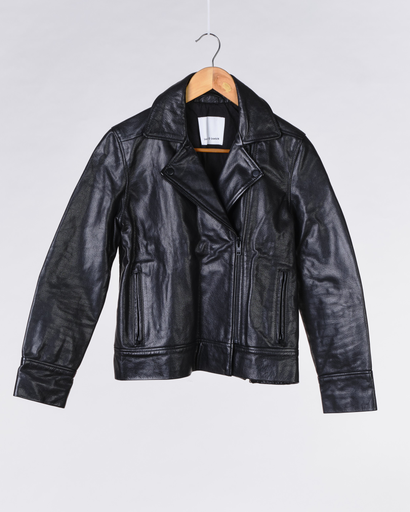

In [114]:
from PIL import Image
import pyperclip
IMAGE_DIR_PATH = "../FREja_dataset_processing/outfit_images"
outfit_row = outfits_df.iloc[45]
preview_image = Image.open(f"{IMAGE_DIR_PATH}/{outfit_row['file_name']}")
preview_image.thumbnail((512, 512),Image.Resampling.LANCZOS)

pyperclip.copy(f"https://fjong.com/outfits/{outfit_row['outfit_id']}")
preview_image

In [115]:
#scipy.spatial.distance.pdist(encoding_pair, "cityblock")
import scipy.spatial.distance

def get_distance_to_point(tag_one, tag_two):
    encoding_pair = np.vstack((tag_one, tag_two))
    distance = scipy.spatial.distance.pdist(encoding_pair)
    return distance

#outfits_df["tag_distance_to_first"] = outfits_df["tag_encoding"].apply()
start_point = outfit_row["tag_encoding"]#outfits_df["tag_encoding"].iloc[0]
#tag_two = outfits_df["tag_encoding"].iloc[1]
#get_distance_to_point(tag_one, tag_two)
outfits_df["tag_distance_to_first"] = outfits_df["tag_encoding"].apply(lambda x: get_distance_to_point(start_point, x))

In [116]:
outfits_df.sort_values(["tag_distance_to_first"]).groupby("outfit_id").head(1)

,outfit_id,outfit_version,file_name,embeddings,outfit_tags,tag_encoding,tag_distance_to_first
45,outfit.176fd87e121d4865b1ad3c9b6c5bbb8a,0,outfit.176fd87e121d4865b1ad3c9b6c5bbb8a_0.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Winter, Dressed-up, Jackets, Everyday, Samsøe...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[0.0]
2867,outfit.015e34f72aec4f028427f4e947f6b54b,0,outfit.015e34f72aec4f028427f4e947f6b54b_0.jpg,"[tensor(0.), tensor(0.1961), tensor(0.0480), t...","[Winter, Outerwear, Jackets, Ella&Il, Everyday...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[2.6457513110645907]
2216,outfit.5b7cf902153e45bd86f011cf78b3c24d,1,outfit.5b7cf902153e45bd86f011cf78b3c24d_1.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Jackets, Everyday, Fall, Black, Spring, Leath...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[2.6457513110645907]
2342,outfit.3ff1eb25c14543e386a014b0f8ecd34e,1,outfit.3ff1eb25c14543e386a014b0f8ecd34e_1.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Winter, Dressed-up, Large, Everyday, 2Love To...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[3.0]
3900,outfit.69ad5a3b87264a7884c430475c8d31b7,0,outfit.69ad5a3b87264a7884c430475c8d31b7_0.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Winter, Jackets, Everyday, 2Love Tony Cohen, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[3.0]
...,...,...,...,...,...,...,...
799,outfit.61f7da2e7a4c4aa8b8ce3c8518de6cd6,0,outfit.61f7da2e7a4c4aa8b8ce3c8518de6cd6_0.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(1....","[Yellow, High, Cotton, T-shirt, Holzweiler x F...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[5.0]
1425,outfit.5519f49387394b2fa6bfb4f210610b4b,0,outfit.5519f49387394b2fa6bfb4f210610b4b_0.jpg,"[tensor(0.), tensor(0.9630), tensor(0.), tenso...","[Mid arms, Loose fit, Everyday, Normal, Day Bi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[5.0990195135927845]
118,outfit.07433f25ff9a45fdbe08a3fc4d8d1a4f,1,outfit.07433f25ff9a45fdbe08a3fc4d8d1a4f_1.jpg,"[tensor(0.), tensor(0.), tensor(2.6220), tenso...","[Lyocell, Ruffles, High, Viscose, Large, Every...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",[5.196152422706632]
1783,outfit.38414373640b4c43be5d26464533780c,1,outfit.38414373640b4c43be5d26464533780c_1.jpg,"[tensor(0.), tensor(0.), tensor(1.5098), tenso...","[Nylon, High, Cotton, Viscose, T-shirt, Wrap, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",[5.291502622129181]


In [83]:
outfits_df = outfits_df.drop("tag_distance_to_first", axis=1)
outfits_df

,outfit_id,outfit_version,file_name,embeddings,outfit_tags,tag_encoding
0,outfit.45ed1b534f9b418db7d38fd7f081fa49,3,outfit.45ed1b534f9b418db7d38fd7f081fa49_3.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Urban Pioneers, Wool, Winter, Knitwear, Every...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a,0,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a_0.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Nylon, Dressed-up, Viscose, Everyday, Fall, M...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,outfit.52e5a272205d4d3b92a12794d6afa6d9,0,outfit.52e5a272205d4d3b92a12794d6afa6d9_0.jpg,"[tensor(0.), tensor(1.0762), tensor(1.2814), t...","[Sporty, FJONG Active, Scandinavian Edition, W...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,outfit.1726aa1235254dc29f66789cfd48c5b9,0,outfit.1726aa1235254dc29f66789cfd48c5b9_0.jpg,"[tensor(0.), tensor(0.), tensor(2.0316), tenso...","[Silk, Ruffles, Dressed-up, Going out, Midi, R...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,outfit.36746094c7154b3fa8e2d2901387f26a,3,outfit.36746094c7154b3fa8e2d2901387f26a_3.jpg,"[tensor(0.), tensor(0.), tensor(1.1273), tenso...","[Wool, Winter, Second Female, Cotton, Knitwear...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
4074,outfit.01e83892189444ea9d3673c318442b9b,3,outfit.01e83892189444ea9d3673c318442b9b_3.jpg,"[tensor(0.), tensor(0.), tensor(1.5022), tenso...","[Winter, Nylon, Cotton, Viscose, Loose fit, Kn...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4075,outfit.56d3f2c017784688a3884a555cf1ace2,1,outfit.56d3f2c017784688a3884a555cf1ace2_1.jpg,"[tensor(0.), tensor(2.2878), tensor(0.3644), t...","[Silk, Acne Studios, Normal, Dresses, V-neck, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4076,outfit.1bee365da3a84e53aecc44958f9c7bf8,2,outfit.1bee365da3a84e53aecc44958f9c7bf8_2.jpg,"[tensor(0.3667), tensor(0.9154), tensor(0.), t...","[Viscose, Loose fit, Floral, Everyday, Normal,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4077,outfit.3ef6d2dce9f4492d905e79441b02fb8d,2,outfit.3ef6d2dce9f4492d905e79441b02fb8d_2.jpg,"[tensor(0.), tensor(0.9549), tensor(0.2560), t...","[Dressed-up, C.L.E.A.N by Christina Ledang, Vi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [99]:
import pickle
# df_file = open("tag_embeddings_df.pkl", "ab")
# pickle.dump(outfits_df, df_file)
# df_file.close()
outfits_df.to_pickle("tag_embeddings_df.pkl")

In [101]:
copy_df = pickle.load(open("tag_embeddings_df.pkl", "rb"))
copy_df

,outfit_id,outfit_version,file_name,embeddings,outfit_tags,tag_encoding
0,outfit.45ed1b534f9b418db7d38fd7f081fa49,3,outfit.45ed1b534f9b418db7d38fd7f081fa49_3.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Urban Pioneers, Wool, Winter, Knitwear, Every...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a,0,outfit.34eee58b95f2469ebbd6cc2e8ef47b1a_0.jpg,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[Nylon, Dressed-up, Viscose, Everyday, Fall, M...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,outfit.52e5a272205d4d3b92a12794d6afa6d9,0,outfit.52e5a272205d4d3b92a12794d6afa6d9_0.jpg,"[tensor(0.), tensor(1.0762), tensor(1.2814), t...","[Sporty, FJONG Active, Scandinavian Edition, W...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,outfit.1726aa1235254dc29f66789cfd48c5b9,0,outfit.1726aa1235254dc29f66789cfd48c5b9_0.jpg,"[tensor(0.), tensor(0.), tensor(2.0316), tenso...","[Silk, Ruffles, Dressed-up, Going out, Midi, R...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,outfit.36746094c7154b3fa8e2d2901387f26a,3,outfit.36746094c7154b3fa8e2d2901387f26a_3.jpg,"[tensor(0.), tensor(0.), tensor(1.1273), tenso...","[Wool, Winter, Second Female, Cotton, Knitwear...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
4074,outfit.01e83892189444ea9d3673c318442b9b,3,outfit.01e83892189444ea9d3673c318442b9b_3.jpg,"[tensor(0.), tensor(0.), tensor(1.5022), tenso...","[Winter, Nylon, Cotton, Viscose, Loose fit, Kn...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4075,outfit.56d3f2c017784688a3884a555cf1ace2,1,outfit.56d3f2c017784688a3884a555cf1ace2_1.jpg,"[tensor(0.), tensor(2.2878), tensor(0.3644), t...","[Silk, Acne Studios, Normal, Dresses, V-neck, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4076,outfit.1bee365da3a84e53aecc44958f9c7bf8,2,outfit.1bee365da3a84e53aecc44958f9c7bf8_2.jpg,"[tensor(0.3667), tensor(0.9154), tensor(0.), t...","[Viscose, Loose fit, Floral, Everyday, Normal,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4077,outfit.3ef6d2dce9f4492d905e79441b02fb8d,2,outfit.3ef6d2dce9f4492d905e79441b02fb8d_2.jpg,"[tensor(0.), tensor(0.9549), tensor(0.2560), t...","[Dressed-up, C.L.E.A.N by Christina Ledang, Vi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [58]:
outfits_df["outfit_tags"].apply(lambda x: len(x))

0       12
1       14
2       12
3       14
4       15
        ..
4074    17
4075    10
4076    13
4077    13
4078    11
Name: outfit_tags, Length: 4079, dtype: int64

In [9]:
tag_df["tagCategory"].value_counts()

Brand            469
Material          42
Category          23
Color             18
Size              12
No category       11
Occassion          9
Sleeve             7
Embellishment      7
Neckline           7
Waist              6
Shoe Size          6
Pattern            6
Fit                4
Length             4
Occasion           2
brand              1
Name: tagCategory, dtype: int64

In [70]:
import scipy.spatial.distance

encoding_pair = np.vstack(outfits_df["tag_encoding"].iloc[:5].values)
scipy.spatial.distance.pdist(encoding_pair, "cityblock")
#encoding_pair.shape

array([20., 18., 22., 15., 20., 14., 25., 22., 19., 27.])